# ***Dataset Type*** = Classification

***Import all the Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
fraud = pd.read_csv("/kaggle/input/datasets/mohan3005/frauds/Fraud.csv")

In [3]:
fraud.shape

(6362620, 11)

***Cheack for basic Info and NULL values***

In [4]:
print("\nDataset Info:")
print(fraud.info())

print("\nMissing Values:")
print(fraud.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


***Cheack for fraud Percentage***

In [5]:
fraud_percent = fraud['isFraud'].mean()*100

print("\nFraud Percentage:", fraud_percent)


Fraud Percentage: 0.12908204481801522


***Droping useless columns***

In [6]:
fraud = fraud.drop(["nameOrig","nameDest"],axis = 1)

In [7]:
fraud.columns ##We the removed Useless Columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

***Converting categorical to numeric***

In [8]:
##We have type row which is object Type
fraud = pd.get_dummies(fraud, columns=['type'], drop_first=True)

***Defining X and Y***

In [9]:
X = fraud.drop("isFraud",axis = 1)

Y = fraud["isFraud"]

***Test Train Split***

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42,stratify=Y)


print("\nTrain shape:", X_train.shape)

print("Test shape:", X_test.shape)


Train shape: (5090096, 11)
Test shape: (1272524, 11)


***Train Model***

In [11]:
model = RandomForestClassifier(

n_estimators=100,

max_depth=10,

random_state=42,

n_jobs=-1

)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

***Prediction***

In [12]:
y_pred = model.predict(X_test)

***Evaluation***

In [13]:
print("\nConfusion Matrix:")

print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")

print(classification_report(y_test, y_pred))


print("\nPrecision:", precision_score(y_test, y_pred))

print("Recall:", recall_score(y_test, y_pred))

print("F1 Score:", f1_score(y_test, y_pred))


Confusion Matrix:
[[1270875       6]
 [    452    1191]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.72      0.84      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.86      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524


Precision: 0.9949874686716792
Recall: 0.7248934875228241
F1 Score: 0.8387323943661972


***Feature Importance***

In [14]:
importance = pd.Series(

model.feature_importances_,

index=X.columns

).sort_values(ascending=False)


print("\nFeature Importance:")

print(importance)


Feature Importance:
newbalanceDest    0.339468
oldbalanceOrg     0.282673
amount            0.122594
step              0.072090
oldbalanceDest    0.062717
type_TRANSFER     0.056358
newbalanceOrig    0.032923
type_CASH_OUT     0.027487
type_PAYMENT      0.002281
isFlaggedFraud    0.001399
type_DEBIT        0.000011
dtype: float64


***Most important feature list***

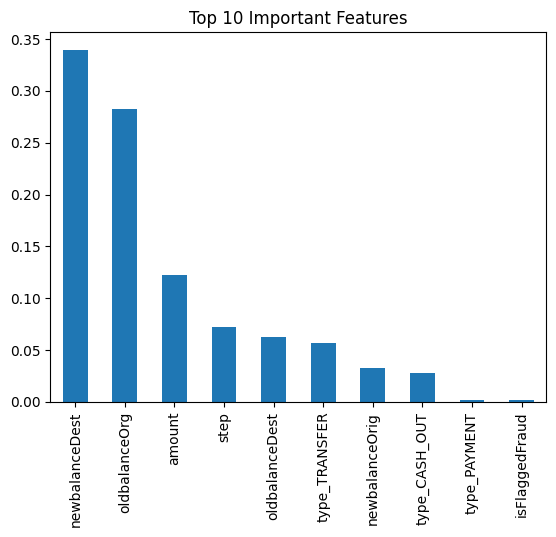

In [15]:
importance.head(10).plot(

kind='bar',

title="Top 10 Important Features"

)

plt.show()

***Displaying Fraud Versus Transfer***

In [16]:
fraud_by_type = pd.crosstab(

fraud['isFraud'],

fraud['type_TRANSFER']

)

print("\nFraud vs Transfer:")

print(fraud_by_type)



Fraud vs Transfer:
type_TRANSFER    False   True 
isFraud                       
0              5825595  528812
1                 4116    4097


***Save Model***

In [17]:
import joblib

joblib.dump(model, "fraud_model.pkl")


print("\nModel saved successfully!")


Model saved successfully!
